In [34]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
dt = pd.read_csv ('delivery_time.csv')
dt.shape

(21, 2)

In [36]:
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [37]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<function matplotlib.pyplot.show(close=None, block=None)>

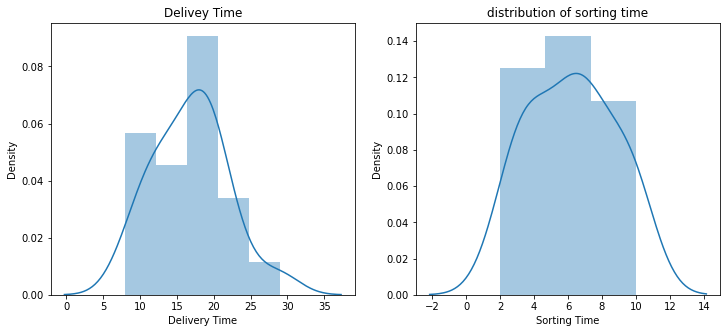

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(dt['Delivery Time'], ax=axes[0])
axes[0].set_title("Delivey Time")

sns.distplot(dt['Sorting Time'], ax=axes[1])
axes[1].set_title("distribution of sorting time")

plt.show

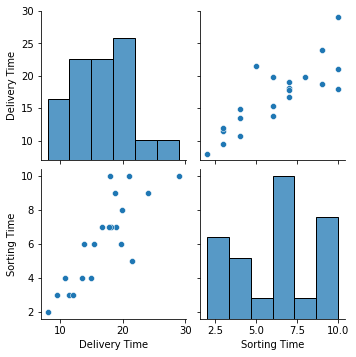

In [39]:
sns.pairplot(dt)

In [25]:
dt1 = dt.rename(columns = {'Delivery Time' :'d_t', 'Sorting Time':'s_t'}, inplace = True)

In [26]:
model = smf.ols(("d_t~s_t"), data=dt).fit()

<AxesSubplot:xlabel='s_t', ylabel='d_t'>

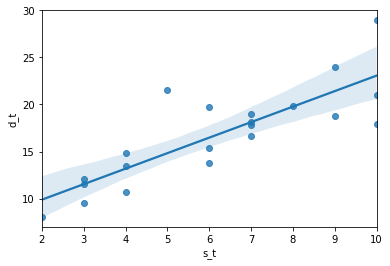

In [27]:
sns.regplot(x='s_t', y='d_t', data = dt)

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    d_t   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        22:47:21   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
s_t            1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Coefficients
model.params

Intercept    6.582734
s_t          1.649020
dtype: float64

In [30]:
print(model.pvalues,'\n', model.tvalues)

Intercept    0.001147
s_t          0.000004
dtype: float64 
 Intercept    3.823349
s_t          6.387447
dtype: float64


In [31]:
print (model.rsquared,model.rsquared_adj)

0.6822714748417231 0.6655489208860244


## Prediction

In [40]:
newdata = pd.Series ([8,18])
dataframe1 = pd.DataFrame(newdata,columns=['s_t'])
model.predict(dataframe1)

0    19.774893
1    36.265092
dtype: float64